# Optimization and Algorithms Project - Task 9

## Group Members
*David Marafuz Gaspar* | 106541  
*Pedro Gaspar Mónico* | 106626  
*Francisco Palma* | 105949  
*Pedro Salazar Leite* | 106812  

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Load Data
circle_data = np.load("Data/circle_data_2.npy")

[[-0.30360928 -0.16991325 -0.58024727  0.0390094  -1.08962452 -0.84615531
  -0.28832035 -0.80272717  0.1423895   0.15790697  0.29186402 -0.37790326
  -0.14752007 -0.7629669  -0.32820668  0.03600997 -1.17031275 -0.06282579
  -0.22583638  0.13504058 -0.62137473 -0.65966327 -0.6043652  -0.66416215
   0.02908948]
 [ 1.30204229  2.19046287  1.68310073  1.2126593   2.02743129  1.82292876
   1.80524538  1.7490528   1.08183004  0.89112132  1.47362392  1.1441974
   1.2900225   2.15037038  1.7621726   1.23213999  2.00255672  0.88050212
   1.7116069   1.00507869  2.26897777  1.89523865  2.01598041  1.93401167
   1.68048323]]
(2, 25)
[[ 1.          0.60721856 -2.60408459]
 [ 1.          0.33982651 -4.38092575]
 [ 1.          1.16049453 -3.36620147]
 [ 1.         -0.0780188  -2.4253186 ]
 [ 1.          2.17924904 -4.05486258]
 [ 1.          1.69231062 -3.64585752]
 [ 1.          0.5766407  -3.61049075]
 [ 1.          1.60545435 -3.49810561]
 [ 1.         -0.284779   -2.16366008]
 [ 1.         -0.31

Text(0, 0.5, 'x2')

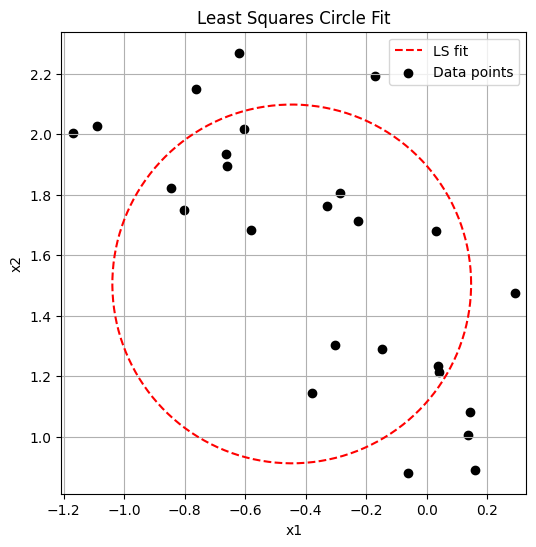

In [3]:
print(circle_data)
print(np.shape(circle_data))  # 2 rows x 25 columns.

# Creating the matrices A & b, A = 25 * 3, b = 25 * 1

A = np.zeros((25, 3))  # Matrix A empty

for i in range(25):  # i in range of the rows
    A[i, 0] = 1  # column zero, all 1's
    A[i, 1] = -2 * circle_data[0, i]  # x_i^T is just the row vector
    A[i, 2] = -2 * circle_data[1, i]

print(A)

b = np.zeros((25, 1))  # Matrix b empty

for i in range(25):
    b[i, 0] = -(np.linalg.norm(circle_data[:, i]) ** 2)

print(b)

x_atomic, residuals, rank, s = np.linalg.lstsq(
    A, b, rcond=None
)  # Atomic problem very easy to solve

print("Shape of solution:", x_atomic.shape)
y_optimal = x_atomic[0]
c_optimal = x_atomic[1:]

# Computing R:

R_ls = np.sqrt(np.linalg.norm(c_optimal) ** 2 - y_optimal)
print(f"The optimal value of R using least squares is {R_ls}")
print(f"The optimal value of c using least squares is {c_optimal}")


cx, cy = (
    c_optimal.flatten()
)  # c_optimal is shape (2,1) or (2,), flatten ensures scalars


theta = np.linspace(0, 2 * np.pi, 300)
circle_x = cx + R_ls * np.cos(theta)
circle_y = cy + R_ls * np.sin(theta)


plt.figure(figsize=(6, 6))
plt.plot(circle_x, circle_y, label="LS fit", color="red", linestyle="--")
plt.scatter(circle_data[0, :], circle_data[1, :], color="black", label="Data points")
plt.grid(True)
plt.axis("equal")  
plt.legend()
plt.title("Least Squares Circle Fit")
plt.xlabel("x1")
plt.ylabel("x2")
